In [ ]:
###My code

In [4]:
#!pip install tweepy
#!pip install vaderSentiment
import pandas as pd
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import os, sys, csv, json, tweepy
api_key ='5DfilgI3A2nNjjeZASJotNIRi'
api_secret = '6qR1b64LiUaajiatBaLY1xqGCk6Ttm8jrT11IJX5LT1rQ6z0Su'
access_token = '764057586-jYqHwQWKHKnpFcUDk8hC0ANE5GZ2LHFySi6BI4ro'
atsecret = 'NHOcv4sBElK0d1fy56ySi97MnHQTsbZu4MPMGETNRHwjJ'
analyzer = SentimentIntensityAnalyzer()

  Using cached tweepy-3.8.0-py2.py3-none-any.whl (28 kB)
  Using cached requests_oauthlib-1.3.0-py2.py3-none-any.whl (23 kB)
  Using cached oauthlib-3.1.0-py2.py3-none-any.whl (147 kB)


In [2]:
auth = tweepy.OAuthHandler(api_key, api_secret)
auth.set_access_token(access_token, atsecret)
api = tweepy.API(auth)

In [3]:
def tweets(group):
    tweets = []
    name = []
    created_at = []
    full_text = []
    vader_sent = []
    
    for tweet in tweepy.Cursor(api.user_timeline, group, tweet_mode='extended').items(100):
        tweets.append(tweet)
    for t in tweets:
        name.append(group)
        created_at.append(t.created_at)
        full_text.append(t.full_text)
        vader_sent.append(analyzer.polarity_scores(t.full_text))
        
    return(name, created_at, full_text, vader_sent)
def checkSentiment(vader):
    negative = []
    neutral = [] 
    positive = []
    compound = []

    for sentiment in vader:
        negative.append(sentiment['neg'])
        neutral.append(sentiment['neu'])
        positive.append(sentiment['pos'])
        compound.append(sentiment['compound'])
    return(negative, neutral, positive, compound)
def dataFrame(name, created_at, full_text, vader_sent, nega, neut, pos, comp):
    tweets_df = pd.DataFrame({
    'Organization': name,
    'Tweet Time': created_at,
    'Tweet Text': full_text,
    'Positive Points': pos,
    'Neutral Points': neut,
    'Negative Points': nega,
    'Compound': comp,
    })
    return(tweets_df)
def boxAndScatterPlot(dataFrame_storage, bar):
    df = dataFrame_storage
    #df = df.groupby(['Organization'])
    if bar == 'bar':
        ax = df.plot.bar(x='Organization', y='Compound', colormap = 'viridis')
    else:
        ax = df.plot.scatter(x='Organization', y='Compound', colormap = 'viridis')
    
    try:
        os.remove(f'{bar}.png')
        print('Found copy: Removed')
        plt.savefig(f'{bar}.png')
    except:
        print('Creating png')
        plt.savefig(f'{bar}.png')
    

Creating png
Creating png


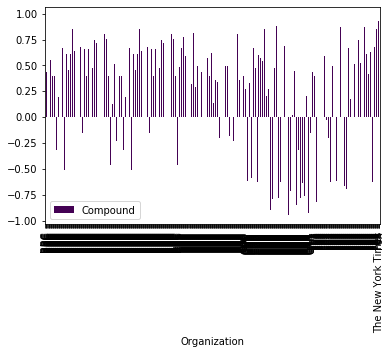

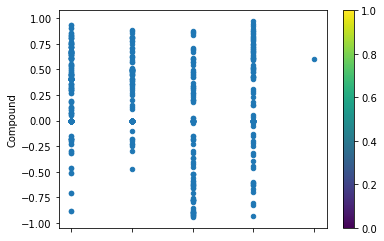

In [4]:
def main():
    listToGoThrough = ['BBC', 'CBS', 'CNN', 'Fox', 'The New York Times']
    dataFrame_storage = []
    for group in listToGoThrough:
        name, created_at, full_text, vader_sent = tweets(group)
        nega, neut, pos, comp = checkSentiment(vader_sent)
        tweetsDataFrame = dataFrame(name, created_at, full_text, vader_sent,
                                    nega, neut, pos, comp)
        if group == 'BBC':
            dataFrame_storage = tweetsDataFrame
        dataFrame_storage = dataFrame_storage.append(tweetsDataFrame)
    x = ['bar', 'scatter']
    for bar in x:
        boxAndScatterPlot(dataFrame_storage, bar)
        
main()

In [1]:
### DID NOT COME OUT HOW I WANTED...

In [6]:
# Dependencies
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import tweepy
import time
import warnings
warnings.filterwarnings("ignore")

# API keys
import api_keys

# Initialize Sentiment Analyzer 
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
consumer_key = api_keys.consumer_key
consumer_secret = api_keys.consumer_secret
access_token = api_keys.access_token
access_token_secret = api_keys.access_token_secret
 # Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

# Select News Sources (Twitter Accounts)
news_source = ["FoxNews", "CNN", "BBCWorld", "CBSNews", "nytimes"]


 # Create a generic dictionary for holding all tweet information
tweet_data = {
    "tweet_source": [],
    "tweet_text": [],
    "tweet_date": [],
    "tweet_vader_score": [],
    "tweet_neg_score": [],
    "tweet_pos_score": [],
    "tweet_neu_score": []
}

# Grab 100 tweets from each site (total 500)
for x in range(5):

    # Loop through all news sources
    for source in news_source:

        # Grab the tweets
        tweets = api.user_timeline(source, page=x)

        # For each tweet store it into the dictionary
        for tweet in tweets:
            
            # All data is grabbed from the JSON returned by Twitter
            tweet_data["tweet_source"].append(tweet["user"]["name"])
            tweet_data["tweet_text"].append(tweet["text"])
            tweet_data["tweet_date"].append(tweet["created_at"])

            # Run sentiment analysis on each tweet using Vader
            tweet_data["tweet_vader_score"].append(analyzer.polarity_scores(tweet["text"])["compound"])
            tweet_data["tweet_pos_score"].append(analyzer.polarity_scores(tweet["text"])["pos"])
            tweet_data["tweet_neu_score"].append(analyzer.polarity_scores(tweet["text"])["neu"])
            tweet_data["tweet_neg_score"].append(analyzer.polarity_scores(tweet["text"])["neg"])
            
# Store the final contents into a DataFrame
tweet_df = pd.DataFrame(tweet_data, columns=["tweet_source", 
                                             "tweet_text", 
                                             "tweet_date",
                                             "tweet_vader_score",
                                             "tweet_pos_score",
                                             "tweet_neu_score",
                                             "tweet_neg_score"])

# Export to CSV
file_name = str(time.strftime("%m-%d-%y")) + "-tweets.csv"
tweet_df.to_csv("analysis/" + file_name, encoding="utf-8")

# Visualize the DataFrame
tweet_df.head()            


ModuleNotFoundError: No module named 'textblob'

In [7]:
tweet_df.count()

NameError: name 'tweet_df' is not defined

In [8]:
plt.scatter(np.arange(-len(tweet_df[tweet_df["tweet_source"] == "BBC News (World)"]), 0, 1), 
            tweet_df[tweet_df["tweet_source"] == "BBC News (World)"]["tweet_vader_score"],
            edgecolor="black", linewidths=1, marker="o", color="skyblue", s=75,
            alpha=0.8, label="BBC")

plt.scatter(np.arange(-len(tweet_df[tweet_df["tweet_source"] == "CBS News"]), 0, 1), 
            tweet_df[tweet_df["tweet_source"] == "CBS News"]["tweet_vader_score"],
            edgecolor="black", linewidths=1, marker="o", color="green", s=75,
            alpha=0.8, label="CBS")

plt.scatter(np.arange(-len(tweet_df[tweet_df["tweet_source"] == "CNN"]), 0, 1), 
            tweet_df[tweet_df["tweet_source"] == "CNN"]["tweet_vader_score"],
            edgecolor="black", linewidths=1, marker="o", color="red", s=75,
            alpha=0.8, label="CNN")

plt.scatter(np.arange(-len(tweet_df[tweet_df["tweet_source"] == "Fox News"]), 0, 1), 
            tweet_df[tweet_df["tweet_source"] == "Fox News"]["tweet_vader_score"],
            edgecolor="black", linewidths=1, marker="o", color="b", s=75,
            alpha=0.8, label="Fox")

plt.scatter(np.arange(-len(tweet_df[tweet_df["tweet_source"] == "The New York Times"]), 0, 1), 
            tweet_df[tweet_df["tweet_source"] == "The New York Times"]["tweet_vader_score"],
            edgecolor="black", linewidths=1, marker="o", color="gold", s=75,
            alpha=0.8, label="New York Times")

# Incorporate the other graph properties
plt.title("Sentiment Analysis of Media Tweets (%s)" % time.strftime("%x"))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.xlim([-105, 5])
plt.xticks([-100, -80, -60, -40, -20, 0], [100, 80, 60, 40, 20, 0])
plt.ylim([-1.05, 1.05])
plt.grid(True)

# Create a legend
lgnd = plt.legend(fontsize="small", mode="Expanded", 
                  numpoints=1, scatterpoints=1, 
                  loc="upper left", bbox_to_anchor=(1,1), title="Media Sources", 
                  labelspacing=0.5)

# Save the figure (and account for the legend being outside the plot when saving)
file_name = str(time.strftime("%m-%d-%y")) + "-Fig1.png"
plt.savefig("analysis/" + file_name, bbox_extra_artists=(lgnd, ), bbox_inches='tight')

# Show plot
plt.show()

NameError: name 'tweet_df' is not defined

In [9]:
# Average all polarities by news source
tweet_df_polarity = tweet_df.groupby(["tweet_source"]).mean()["tweet_vader_score"]

# View the polarities
pd.DataFrame(tweet_df_polarity)

NameError: name 'tweet_df' is not defined

In [ ]:
# Store all polarities in a tuple
tweets_polarity = (tweet_df_polarity["BBC News (World)"], 
                    tweet_df_polarity["CBS News"], 
                    tweet_df_polarity["CNN"], 
                    tweet_df_polarity["Fox News"],
                    tweet_df_polarity["The New York Times"])

# Generate bars for each news source
fig, ax = plt.subplots()
ind = np.arange(len(tweets_polarity))  
width = 1
rect1 = ax.bar(ind[0], tweets_polarity[0], width, color="skyblue")
rect2 = ax.bar(ind[1], tweets_polarity[1], width, color="green")
rect3 = ax.bar(ind[2], tweets_polarity[2], width, color="red")
rect4 = ax.bar(ind[3], tweets_polarity[3], width, color='blue')
rect5 = ax.bar(ind[4], tweets_polarity[4], width, color='gold')

# Generate labels for each news source
def autolabelpos(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1*height,
                '+%.2f' % float(height),
                ha='center', va='bottom')

def autolabelneg(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., -1*height-0.015,
                '-%.2f' % float(height),
                ha='center', va='bottom')
    
autolabelpos(rect1)
autolabelneg(rect2)
autolabelneg(rect3)
autolabelpos(rect4)
autolabelneg(rect5)

# Orient widths, add labels, tick marks, etc. 
ax.set_ylabel("Tweet Polarity")
ax.set_title("Overall Media Sentiment based on Twitter (%s) " % (time.strftime("%x")))
ax.set_xticks(ind + 0.5)
ax.set_xticklabels(("BBC", "CBS", "CNN", "Fox", "NYT"))
ax.set_autoscaley_on(True)
ax.grid(False)

# Save Figure
file_name = str(time.strftime("%m-%d-%y")) + "-Fig2.png"
plt.savefig("analysis/" + file_name, bbox_extra_artists=(lgnd, ), bbox_inches='tight')

# Show Figure
fig.show()